In [1]:
import time
import pandas as pd
import numpy as np

# For plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


## Gathering Data

Strava has a publicly available API interface that allows developers to access Strava data. Mandie Quartly has wrote an excellent guide on how to grab your Strava data using Stravas API V3, this guide can be found [here](https://medium.com/@mandieq). The csv file that is read in the following section was retrieved using this guide.



## Data Exploration

In [2]:
df = pd.read_csv("activities.csv")
df.head()

,Unnamed: 0,id,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,elev_high,elev_low,average_speed,max_speed,start_latitude,start_longitude,flagged,distance_km,day_of_week,month_of_year
0,0,4270212916,2020-11-01 10:41:51,Run,6257.7,0 days 00:33:03.000000000,0 days 00:34:56.000000000,12.2,40.9,26.7,3.156,5.3,41.960250,3.038900,False,6.2577,Sunday,11
1,1,4261801695,2020-10-30 12:11:15,Run,6509.1,0 days 00:32:31.000000000,0 days 00:32:31.000000000,12.1,40.1,26.7,3.336,7.0,41.960362,3.039066,False,6.5091,Friday,10
2,2,4258427984,2020-10-29 14:34:26,Run,1313.1,0 days 00:07:04.000000000,0 days 00:07:04.000000000,5.9,39.5,33.3,3.097,9.1,41.970032,3.033507,False,1.3131,Thursday,10
3,3,4258403656,2020-10-29 14:03:07,Run,6466.1,0 days 00:30:34.000000000,0 days 00:30:34.000000000,7.0,40.1,26.3,3.526,5.0,41.960384,3.039412,False,6.4661,Thursday,10
4,4,4249784457,2020-10-27 13:49:43,Run,1275.3,0 days 00:07:17.000000000,0 days 00:07:28.000000000,5.8,40.0,33.8,2.918,4.5,41.969520,3.033521,False,1.2753,Tuesday,10


The next line of code returns the name of each feature along with the respective data type. This is useful in order to quickly observe if the data needs to be cleaned from undesirable samples.

In [3]:
df.dtypes

Unnamed: 0                int64
id                        int64
start_date_local         object
type                     object
distance                float64
moving_time              object
elapsed_time             object
total_elevation_gain    float64
elev_high               float64
elev_low                float64
average_speed           float64
max_speed               float64
start_latitude          float64
start_longitude         float64
flagged                    bool
distance_km             float64
day_of_week              object
month_of_year             int64
dtype: object

From the above output, one features exists that is not desired. Flagged activities. Flagged activities in Strava art activities were some part of the sample data is not accurate. This is usually the GPS location data. The next line of code reports the number of activities that have a true or false value assigned to the flagged feature. 

In [4]:
df.flagged.value_counts()


False    676
True      16
Name: flagged, dtype: int64

There are 16 runs that have been flagged. The following finds any sample that has a flagged run that equal True, and then drops that row from the dataframe. Afterwards, the dataframe is checked again to ensure that no more flagged runs appear in the dataframe.

In [5]:
df.drop(df[df['flagged'] == True].index, inplace=True)
df.flagged.value_counts()

False    676
Name: flagged, dtype: int64

The project is only interested in running. Therefore the next job is to check if any other activities exist, and if so, drop them from the dataframe. 

In [6]:
df.type.value_counts()

Run         664
Ride         10
Canoeing      1
Hike          1
Name: type, dtype: int64

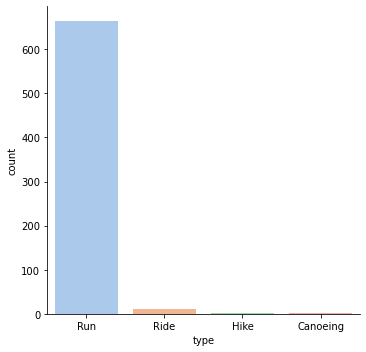

In [7]:
sns.catplot(x='type', kind='count', palette="pastel", data=df)

The above output reports 664 runs, 10 bike rides, 1 canoeing session, and 1 hike. This is also visualised using the displayed plot. Because this project is only interested in running, all but running will now be dropped from the datframe.

In [8]:
df.drop(df[df['type'].isin(['Run']) != True].index, inplace=True)
df.type.value_counts()

Run    664
Name: type, dtype: int64